<a href="https://colab.research.google.com/github/agayen/colab_work/blob/main/LDA_and_LSA_TEXT_TO_VECTOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data set Load

## dependency install

In [155]:
!pip install matplotlib
!pip install gensim

## dataset ready and clean

In [156]:
import json
import pandas as pd
import copy

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

In [157]:
# for text clean and pre-processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [158]:
file_path = "/content/drive/MyDrive/my_research/dataset"


aw_tweets_file_path = open(file_path+"/AW_tweets.json")
aw_tweets = json.load(aw_tweets_file_path)
aw_tweets_file_path.close()

chess_tweets_file_path = open(file_path+"/Chess_tweets.json")
chess_tweets = json.load(chess_tweets_file_path)
chess_tweets_file_path.close()

baseball_tweets_file_path = open(file_path+"/Baseball_tweets.json")
baseball_tweets = json.load(baseball_tweets_file_path)
baseball_tweets_file_path.close()

fashion_tweets_file_path = open(file_path+"/Fashion_tweets.json")
fashion_tweets = json.load(fashion_tweets_file_path)
fashion_tweets_file_path.close()

football_tweets_file_path = open(file_path+"/Football_tweets.json")
football_tweets = json.load(football_tweets_file_path)
baseball_tweets_file_path.close()

In [159]:
def get_tweet_for_datafame(data_json, community):
  res = []
  for outter_key in data_json.keys():
    for key in data_json[outter_key]:
      main_tweets_data = ((data_json.get(outter_key) or {}).get(key) or [{}])[0]
      if bool(main_tweets_data):
        del main_tweets_data['edit_history_tweet_ids']
        main_tweets_data['tweet_id'] = key
        main_tweets_data['community'] = community
        res.append(main_tweets_data)
  return res

In [160]:
formate_aw_tweets=get_tweet_for_datafame(copy.deepcopy(aw_tweets), 'aw')
formate_chess_tweets=get_tweet_for_datafame(copy.deepcopy(chess_tweets), 'chess')
formate_baseball_tweets=get_tweet_for_datafame(copy.deepcopy(baseball_tweets), 'baseball')
formate_football_tweets=get_tweet_for_datafame(copy.deepcopy(football_tweets), 'football')
formate_fashion_tweets=get_tweet_for_datafame(copy.deepcopy(fashion_tweets), 'fashion')

In [161]:
final_df = pd.DataFrame(formate_aw_tweets+formate_chess_tweets+formate_baseball_tweets+formate_football_tweets+formate_fashion_tweets)

In [162]:
final_df.describe()

,author_id,id,lang,text,tweet_id,community
count,16143,16143,16143,16143,16143,16143
unique,167,16143,1,15902,16143,5
top,16913418,885711609838002176,en,one person followed me // automatically checke...,885711609838002176,football
freq,199,1,16143,27,1,7115


In [163]:
# description of data with respect to commuinity
final_df.groupby('community').describe()

author_id                            id                             \
              count unique         top freq count unique                 top   
community                                                                      
aw              483      5    28021917  143   483    483  885711609838002176   
baseball       4951     55  1002951624  188  4951   4951  303696419829714945   
chess          2093     19   850319256  188  2093   2093  647075696658001920   
fashion        1501     18    16913418  199  1501   1501  544449656517058560   
football       7115     70   807507079  194  7115   7115  344256590519611392   

                lang                   text         \
          freq count unique top  freq count unique   
community                                            
aw           1   483      1  en   483   483    483   
baseball     1  4951      1  en  4951  4951   4946   
chess        1  2093      1  en  2093  2093   2093   
fashion      1  1501      1  en  1501  1501   1499   
football     1  7115      1  en  7115  7115   6881   

                                                                  tweet_id  \
                                                         top freq    count   
community                                                                    
aw         I couldn't agree more! Stunning presentation #...    1      483   
baseball   Very Rare #1 Dive Bar High Traffic Location Pr...    2     4951   
chess      @RobertRis @MarkTWIC Timman &amp; @hansbohm64 ...    1     2093   
fashion    Thanks tranoi_show for the support! 💥🚀 #alabmi...    2     1501   
football   one person followed me // automatically checke...   27     7115   

                                           
          unique                 top freq  
community                                  
aw           483  885711609838002176    1  
baseball    4951  303696419829714945    1  
chess       2093  647075696658001920    1  
fashion     1501  544449656517058560    1  
football    7115  344256590519611392    1

In [164]:
def clean_tweet(tweet):

    # Remove full words starting with '@'
    tweet = re.sub(r'@\w+', '', tweet)

    # Remove special characters, URLs, and usernames
    tweet = re.sub(r'http\S+|www\S+|https\S+|@\S+|#\S+|[^A-Za-z0-9]+', ' ', tweet)

    # Convert to lowercase
    tweet = tweet.lower()

    # Tokenize the tweet
    words = word_tokenize(tweet)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # stemmer = PorterStemmer()
    # words = [stemmer.stem(word) for word in words]

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join the words back into a string
    cleaned_tweet = ' '.join(words)

    return cleaned_tweet

# Example usage
tweet = "RT @user123: Check out this amazing tweet with #hashtags and a URL! http://example.com #awesome"
cleaned_tweet = clean_tweet(tweet)
print(cleaned_tweet)


rt check amazing tweet hashtags url awesome


In [165]:
final_df['clean_text'] = final_df['text'].apply(clean_tweet)

In [166]:
final_df.head()

,author_id,id,lang,text,tweet_id,community,clean_text
0,1617682068,885711609838002176,en,I couldn't agree more! Stunning presentation #...,885711609838002176,aw,agree stunning presentation lbqwhc17
1,1617682068,886554516811694080,en,PLS SHARE Disability rights film 14th Aug11.30...,886554516811694080,aw,pls share disability right film 14th aug11 30a...
2,1617682068,887499756267741184,en,@AndyRay87 @rightnowinc @MelbWritersFest Excite!!,887499756267741184,aw,excite
3,1617682068,887557294480736256,en,"I'm heading to Bendigo again next month, this ...",887557294480736256,aw,heading bendigo next month time facilitate wor...
4,1617682068,887557770278391808,en,@JessHealyWalton you were brilliant today! Soo...,887557770278391808,aw,brilliant today sooo good sorry leave early go...


#  LSA implement

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [ ]:
documents = final_df['clean_text']

# Create a document-term matrix using TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
document_term_matrix = vectorizer.fit_transform(documents)

# Apply Latent Semantic Analysis (LSA) using Truncated SVD
n_topics = 20  # You can choose the number of topics
lsa_model = TruncatedSVD(n_components=n_topics, random_state=42)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

# Display the top words for each topic
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(lsa_model.components_):
    top_keywords_idx = topic.argsort()[-5:][::-1]
    top_keywords = [terms[idx] for idx in top_keywords_idx]
    print(f"Topic {i + 1}: {', '.join(top_keywords)}")

# Display the document-topic matrix
print("\nDocument-Topic Matrix:")
print(lsa_topic_matrix)

Topic 1: automatically, checked, person, followed, unfollowed
Topic 2: thank, thanks, day, man, good
Topic 3: thanks, good, man, day, game
Topic 4: thanks, thank, man, bro, appreciate
Topic 5: day, thanks, game, great, blessed
Topic 6: lol, love, got, let, like
Topic 7: let, time, game, knight, love
Topic 8: love, man, happy, got, like
Topic 9: man, congrats, like, got, big
Topic 10: man, let, love, day, lol
Topic 11: got, ta, let, day, bro
Topic 12: game, got, man, love, ta
Topic 13: like, look, know, let, day
Topic 14: time, like, man, day, know
Topic 15: happy, birthday, year, bro, know
Topic 16: know, people, god, need, great
Topic 17: congrats, bro, boy, big, win
Topic 18: new, today, year, amen, collection
Topic 19: right, people, today, going, best
Topic 20: today, bro, amen, amenstyle, collection

Document-Topic Matrix:
[[ 9.36200009e-05  3.20870306e-03  2.29251667e-03 ...  2.58284176e-02
  -2.16303253e-02  1.54384457e-02]
 [ 6.10412385e-04  8.89540622e-03  7.35083938e-03 ...  

In [ ]:
lsa_topic_matrix.shape

(16143, 60)

In [ ]:
print("Document-Term Matrix:")
print(document_term_matrix.shape)
print("\nLSA Topic Matrix:")
print(lsa_topic_matrix.shape)
print("\nExplained Variance Ratio:")
print(lsa_model.explained_variance_ratio_)
#this will from a diagonal matrix

Document-Term Matrix:
(16143, 5000)

LSA Topic Matrix:
(16143, 60)

Explained Variance Ratio:
[0.01230281 0.00681397 0.00779462 0.00646868 0.00578845 0.00537419
 0.00516082 0.00490589 0.00454064 0.00442382 0.00425236 0.00407858
 0.00408615 0.00387062 0.00368086 0.00359267 0.00339307 0.00313501
 0.0030758  0.0030207  0.00294417 0.00287695 0.00283738 0.0028309
 0.00274722 0.00267749 0.00264967 0.00252763 0.00246859 0.00243021
 0.00240285 0.00238541 0.00236144 0.002336   0.00231507 0.00231034
 0.00223244 0.00222456 0.00217946 0.00216848 0.00215002 0.00212652
 0.00212514 0.00211725 0.0020878  0.00209302 0.00204802 0.00201727
 0.00202228 0.00197243 0.00192217 0.00188044 0.00187208 0.00186397
 0.00185153 0.00183015 0.00182008 0.00175252 0.00173445 0.00170931]


## Topics Visualization

In [ ]:
!pip install umap-learn matplotlib

In [ ]:
import umap
import matplotlib.pyplot as plt

# Transforming the document-term matrix using Singular Value Decomposition (SVD)
X_topics = lsa_model.fit_transform(document_term_matrix)

# Applying UMAP for dimensionality reduction and embedding visualization
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


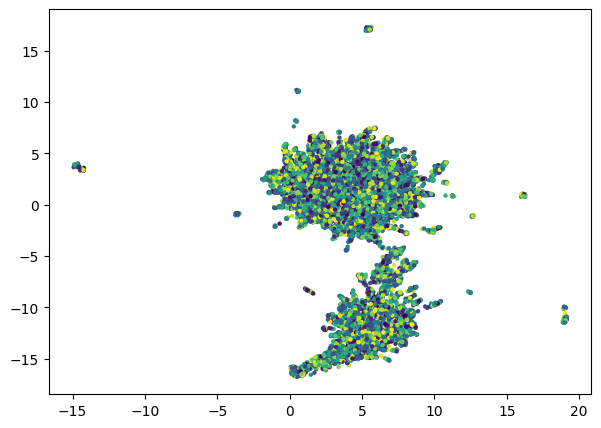

In [ ]:
# Setting up the plot figure with a specific size
plt.figure(figsize=(7, 5))

# Generating random data for illustration
np.random.seed(42)
num_documents = embedding.shape[0]
# Generating random target labels (categories) for each document
num_categories = 5
dataset_target = np.random.randint(0, n_topics, size=num_documents)

# Creating a scatter plot using the UMAP embeddings
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=dataset_target,  # Coloring points based on target values
    s=10,  # Setting point size
    edgecolor='none'
)

# save for Topics Visualization
plt.savefig('topics_visualization.png')

# Displaying the plot
plt.show()



# LDA implement

In [ ]:
final_df.head()

,author_id,id,lang,text,tweet_id,community,clean_text
0,1617682068,885711609838002176,en,I couldn't agree more! Stunning presentation #...,885711609838002176,aw,agree stunning presentation lbqwhc17
1,1617682068,886554516811694080,en,PLS SHARE Disability rights film 14th Aug11.30...,886554516811694080,aw,pls share disability right film 14th aug11 30a...
2,1617682068,887499756267741184,en,@AndyRay87 @rightnowinc @MelbWritersFest Excite!!,887499756267741184,aw,excite
3,1617682068,887557294480736256,en,"I'm heading to Bendigo again next month, this ...",887557294480736256,aw,heading bendigo next month time facilitate wor...
4,1617682068,887557770278391808,en,@JessHealyWalton you were brilliant today! Soo...,887557770278391808,aw,brilliant today sooo good sorry leave early go...


In [ ]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))


data = final_df.clean_text.values.tolist()
data_words = list(sent_to_words(data))

print(data_words[:1][0][:30])

['agree', 'stunning', 'presentation', 'lbqwhc']


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1)]


In [ ]:
from pprint import pprint
# number of topics
num_topics = 20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
# Get the document-topic matrix
doc_topic_matrix = np.zeros((len(corpus), num_topics))

for i, doc_lda in enumerate(lda_model[corpus]):
    for topic_id, prob in doc_lda:
        doc_topic_matrix[i, topic_id] = prob

# Now, doc_topic_matrix is a NumPy array representing the document-topic matrix
print(doc_topic_matrix)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[0.01244887 0.01244887 0.01244887 ... 0.01244887 0.01244887 0.01244887]
 [0.         0.         0.         ... 0.26622051 0.         0.        ]
 [0.05       0.05       0.05       ... 0.05       0.05       0.05      ]
 ...
 [0.18362118 0.01000035 0.01000035 ... 0.01000035 0.01000035 0.01000035]
 [0.01250029 0.01250029 0.01250029 ... 0.01250029 0.01250029 0.01250029]
 [0.01000009 0.01000009 0.01000009 ... 0.01000009 0.01000009 0.01000009]]


##   Topic Veiws

In [ ]:
!pip install pyLDAvis
!pip install "pandas<2.0.0"

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.26.2 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.3 which is incompatible.


In [ ]:
import pyLDAvis.gensim
import pickle
import pyLDAvis
import os
# Visualize the topics

pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) +'.html')

In [ ]:
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
18     0.011920 -0.081352       1        1  7.279615
11     0.011645  0.012393       2        1  5.856243
15     0.060387 -0.007626       3        1  5.801884
1      0.048412  0.047675       4        1  5.788338
9      0.054828  0.115295       5        1  5.532129
3      0.061458  0.083643       6        1  5.308434
12     0.042394  0.071181       7        1  5.292823
4      0.052588  0.073160       8        1  5.241340
5      0.005586 -0.066694       9        1  5.075160
6      0.047643  0.066546      10        1  4.957609
10    -0.010773  0.000590      11        1  4.849488
7     -0.014663 -0.045266      12        1  4.778755
13     0.028704 -0.037270      13        1  4.742208
2     -0.012031 -0.050799      14        1  4.735715
8      0.000453 -0.105718      15        1  4.494569
0      0.024656 -0.117310      16        1  4.368611
17    -0.034729  0.109120      17        1  4.274271
19    -0.033780 -0.010675      18        1  4.208115
16    -0.035903 -0.122922      19        1  4.077432
14    -0.308794  0.066029      20        1  3.337261, topic_info=            Term        Freq       Total Category  logprob  loglift
3314  collection  750.000000  750.000000  Default  30.0000  30.0000
267         wear  909.000000  909.000000  Default  29.0000  29.0000
260        dress  604.000000  604.000000  Default  28.0000  28.0000
4852        shop  472.000000  472.000000  Default  27.0000  27.0000
3405       panda  455.000000  455.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
101         work   13.984546  265.927908  Topic20  -5.5417   0.4547
1323         lol   14.357021  406.158986  Topic20  -5.5155   0.0575
292       thanks   15.561489  775.243606  Topic20  -5.4349  -0.5084
284          get   14.236478  771.426892  Topic20  -5.5239  -0.5924
246      wearing   11.783000  229.366713  Topic20  -5.7130   0.4314

[1252 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
6110      4  0.127467         aac
6110      5  0.764802         aac
518       2  0.055966  absolutely
518       4  0.671588  absolutely
518       9  0.055966  absolutely
...     ...       ...         ...
573      19  0.055353       young
53       15  0.823684     youtube
2176     12  0.885824          yu
2145     13  0.821162         yup
8610      9  0.919429        zero

[4081 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[19, 12, 16, 2, 10, 4, 13, 5, 6, 7, 11, 8, 14, 3, 9, 1, 18, 20, 17, 15])

# Evaluation of Topic Modeling: Topic Coherence

In [ ]:
# Import required packages
import numpy as np
import logging
import pyLDAvis.gensim
import json
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

docs =array(final_df['clean_text'])
# Define function for tokenize and lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

def docs_preprocessor(docs):
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
        docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]

    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 3] for doc in docs]

    # Lemmatize all words in documents.
    lemmatizer = WordNetLemmatizer()
    docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]

    return docs
# Perform function on our document
docs = docs_preprocessor(docs)
#Create Biagram & Trigram Models
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
#Remove rare & common tokens
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=10, no_above=0.2)
#Create dictionary and corpus required for Topic Modeling
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
print(corpus[:1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of unique tokens: 1654
Number of documents: 16143
[[(0, 1), (1, 1), (2, 1)]]


In [ ]:
# Set parameters.
num_topics = 5
chunksize = 500
passes = 20
iterations = 400
eval_every = 1

# Make a index to word dictionary.
temp = dictionary[0]  # only to "load" the dictionary.
id2word = dictionary.id2token

lda_model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)
# Print the Keyword in the 5 topics
print(lda_model.print_topics())

[(0, '0.048*"fall_winter" + 0.041*"andrea_pompilio" + 0.029*"fall" + 0.026*"andrea" + 0.025*"pompilio" + 0.020*"aquilanorimondi" + 0.020*"winter" + 0.017*"milan_fashion" + 0.016*"andreapompilio" + 0.016*"milan"'), (1, '0.035*"amen" + 0.034*"amenstyle" + 0.034*"collection" + 0.031*"aujourlejour" + 0.025*"wear_amen" + 0.023*"love" + 0.021*"thanks" + 0.020*"today" + 0.018*"good" + 0.018*"ss15"'), (2, '0.039*"look" + 0.030*"like" + 0.026*"thank" + 0.023*"issue" + 0.022*"people" + 0.021*"back" + 0.021*"team" + 0.019*"know" + 0.017*"make" + 0.017*"week"'), (3, '0.050*"game" + 0.038*"spring_summer" + 0.037*"time" + 0.036*"total_look" + 0.028*"year" + 0.025*"amazing" + 0.023*"shirt" + 0.022*"spring" + 0.022*"liked_video" + 0.018*"current_issue"'), (4, '0.039*"dress" + 0.038*"wear" + 0.029*"alessandromichele" + 0.028*"guccicruise18_alessandromichele" + 0.023*"guccicruise18" + 0.020*"video" + 0.018*"gucci" + 0.018*"ready" + 0.018*"print" + 0.017*"happy"')]


In [ ]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4093709207795039


In [ ]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -12.103145391329475


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

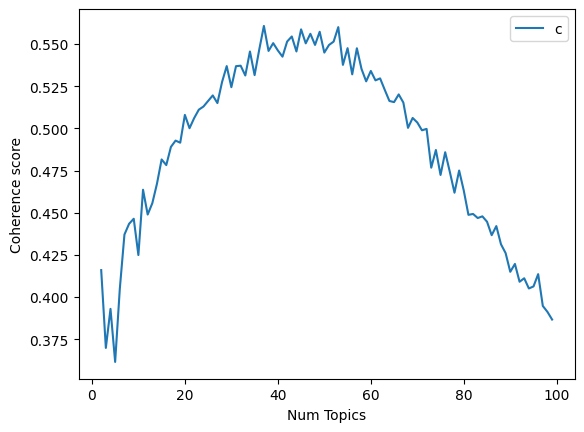

In [ ]:
limit=100; start=2; step=1;

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=start, limit=limit, step=step)

# Show graph
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
len(coherence_values)

98

In [ ]:
max_index = np.argmax(coherence_values)
print('possible to get max values for',max_index+2)

possible to get max values for 37


#  Topic Modelling with LSA and LDA kaggel


## lsa


In [167]:
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

%matplotlib inline

In [168]:
final_df.head()

,author_id,id,lang,text,tweet_id,community,clean_text
0,1617682068,885711609838002176,en,I couldn't agree more! Stunning presentation #...,885711609838002176,aw,agree stunning presentation lbqwhc17
1,1617682068,886554516811694080,en,PLS SHARE Disability rights film 14th Aug11.30...,886554516811694080,aw,pls share disability right film 14th aug11 30a...
2,1617682068,887499756267741184,en,@AndyRay87 @rightnowinc @MelbWritersFest Excite!!,887499756267741184,aw,excite
3,1617682068,887557294480736256,en,"I'm heading to Bendigo again next month, this ...",887557294480736256,aw,heading bendigo next month time facilitate wor...
4,1617682068,887557770278391808,en,@JessHealyWalton you were brilliant today! Soo...,887557770278391808,aw,brilliant today sooo good sorry leave early go...


In [179]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)

    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

# Define helper functions
def get_top_n_words_main(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))
    return top_words

# Define helper functions
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])

        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

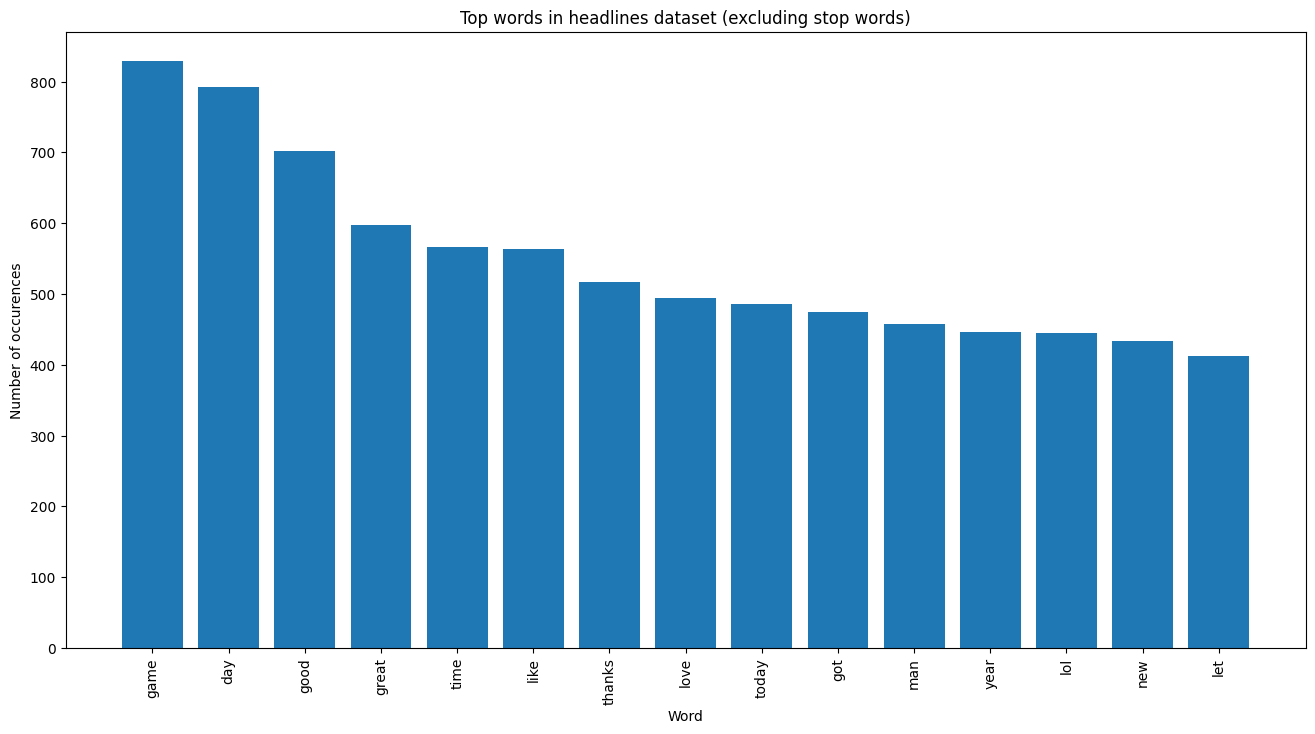

In [170]:
all_documents = final_df["clean_text"]

count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer,
                                     text_data=all_documents)


fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [171]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = all_documents.sample(n=10000, random_state=0).values

print('Tweets before vectorization: {}'.format(small_text_sample[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Tweets after vectorization: \n{}'.format(small_document_term_matrix[123]))

Tweets before vectorization: working first editorial cant wait get back
Tweets after vectorization: 
  (0, 11534)	1
  (0, 11844)	1
  (0, 3589)	1


In [192]:
n_topics = 20

In [193]:
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [195]:
# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [196]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [175]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [197]:
top_n_words_lsa = get_top_n_words_main(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  game make tonight play chess better right work come like
Topic 2:  people checked person automatically followed unfollowed like lot feel life
Topic 3:  game 96 9fm tip search 740am played check head friday
Topic 4:  day happy great blessed today big time work love start
Topic 5:  good luck morning day year look today thanks tonight team
Topic 6:  great team thanks guy good coogs congrats work thank coach
Topic 7:  truck flat haha want bushleague training scrub later photographer rack
Topic 8:  look aquilanorimondi summer spring milano dress ss15 alabmilano amen amenstyle
Topic 9:  new time collection alessandromichele ss15 guccicruise18 fashion amenstyle amen year
Topic 10:  thanks bro man love appreciate hope miss got support lol
Topic 11:  love best team win ucf world want boy come way
Topic 12:  like look thanks team aquilanorimondi amp thing 13 feel total
Topic 13:  today congrats win year better big got tomorrow let looking
Topic 14:  lol na yeah wan yea gon tell like ca

In [199]:
top_3_words = get_top_n_words_main(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

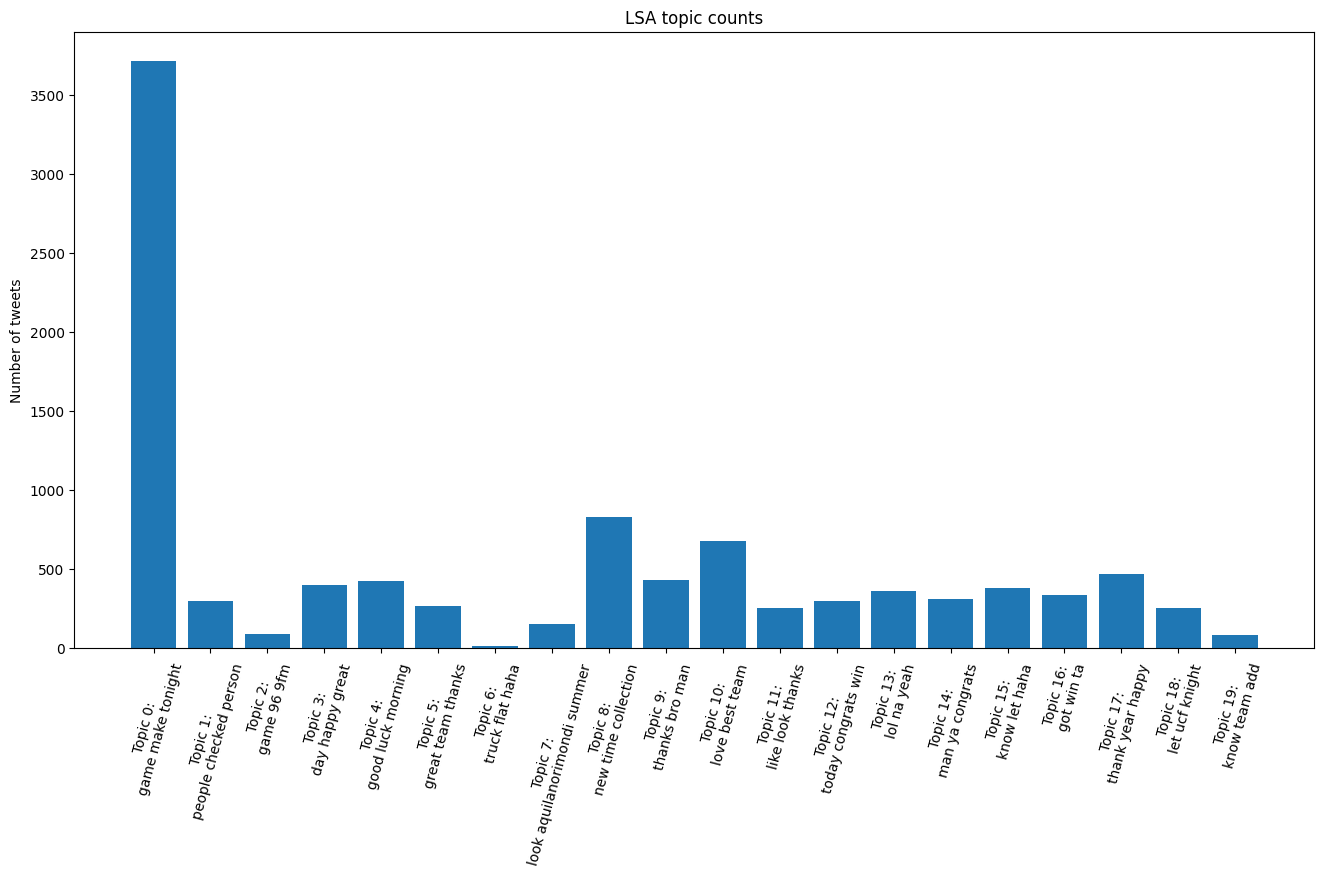

In [200]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
plt.xticks(rotation=75)
ax.set_ylabel('Number of tweets');
ax.set_title('LSA topic counts');
plt.show()

In [198]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100,
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 1.011s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.715942
[t-SNE] KL divergence after 2000 iterations: 0.883535


In [201]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [202]:
top_3_words_lsa = get_top_n_words_main(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), width=700, height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1],
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)

## LDA

In [181]:
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online',
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)

In [182]:
lda_topic_matrix.shape

(10000, 20)

In [183]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [184]:
print(small_document_term_matrix.shape)

(10000, 12035)


In [185]:
len(lda_keys)

10000

In [186]:
top_n_words_lda = get_top_n_words_main(10, lda_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  game great good today win man time luck world night
Topic 2:  thanks going look amazing fan sure follow say aujourlejour man
Topic 3:  video liked fashion saw coogs carlsenkarjakin tried lady told time
Topic 4:  play game score wrong 2015 training amp great angelosbratis maybe
Topic 5:  day time guy congrats best good better man bro friend
Topic 6:  love happy thanks birthday ucf come miss support alabmilano day
Topic 7:  lol year thing player best football black tweet like photo
Topic 8:  start lot fun mean little day beautiful dream congratulation nfl
Topic 9:  checked automatically person people let followed unfollowed carlsenkarjakin know blessed
Topic 10:  team need haha like point game ucf chess tell ok
Topic 11:  know big boy chess check time said day st hey
Topic 12:  knight tonight game live ucf aquilanorimondi family make watch come
Topic 13:  got na gon ta week day wan right lol getting
Topic 14:  chargeon andrea pompilio ss15 coach andreapompilio yeah game weekend

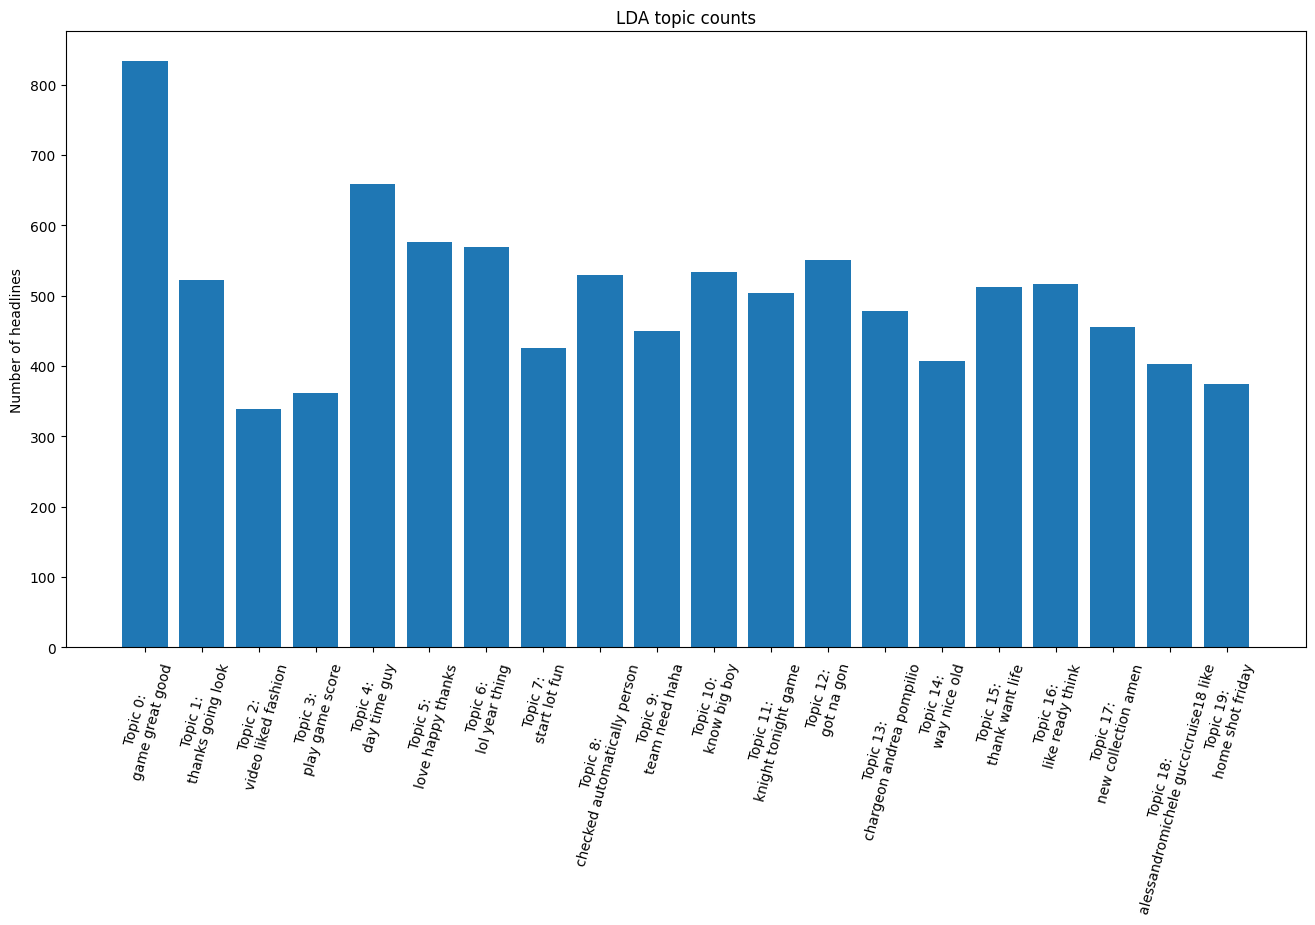

In [187]:
top_3_words = get_top_n_words_main(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels);
plt.xticks(rotation=75)
ax.set_title('LDA topic counts');
ax.set_ylabel('Number of headlines');

In [188]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100,
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 0.951s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.600739
[t-SNE] KL divergence after 2000 iterations: 1.589518


In [190]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [191]:
top_3_words_lda = get_top_n_words_main(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), width=700, height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1],
                  text=top_3_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)

# news20 dataset

## data load

### data to json

In [1]:
!git clone https://github.com/sudhansh200123061/BTP_final.git

Cloning into 'BTP_final'...
remote: Enumerating objects: 37684, done.
remote: Counting objects: 100% (37684/37684), done.
remote: Compressing objects: 100% (37482/37482), done.
remote: Total 37684 (delta 51), reused 37684 (delta 51), pack-reused 0
Receiving objects: 100% (37684/37684), 26.33 MiB | 10.92 MiB/s, done.
Resolving deltas: 100% (51/51), done.
Updating files: 100% (37662/37662), done.


In [6]:
import os
import glob
import pandas as pd
import numpy as np

In [23]:
Myfiles = {}
filname = {}
path1 = '/content/BTP_final/20news-18828'
dir_list = os.listdir(path1)

In [31]:
for fol in dir_list:
    Myfiles[fol] = [I for I in glob.glob(f"{path1}/{fol}/*.txt")]

In [30]:
Myfiles.keys()

dict_keys(['soc.religion.christian', 'sci.med', 'sci.crypt', 'rec.sport.baseball', 'comp.sys.ibm.pc.hardware', 'rec.sport.hockey', 'comp.windows.x', 'comp.sys.mac.hardware', 'talk.religion.misc', 'sci.space', 'talk.politics.mideast', 'comp.graphics', 'sci.electronics', 'misc.forsale', 'talk.politics.misc', 'rec.autos', 'comp.os.ms-windows.misc', 'rec.motorcycles', 'alt.atheism', 'talk.politics.guns'])

In [32]:
Myfiles['soc.religion.christian']

['/content/BTP_final/20news-18828/soc.religion.christian/20696.txt',
 '/content/BTP_final/20news-18828/soc.religion.christian/20795.txt',
 '/content/BTP_final/20news-18828/soc.religion.christian/20956.txt',
 '/content/BTP_final/20news-18828/soc.religion.christian/20747.txt',
 '/content/BTP_final/20news-18828/soc.religion.christian/20853.txt',
 '/content/BTP_final/20news-18828/soc.religion.christian/20715.txt',
 '/content/BTP_final/20news-18828/soc.religion.christian/21522.txt',
 '/content/BTP_final/20news-18828/soc.religion.christian/21434.txt',
 '/content/BTP_final/20news-18828/soc.religion.christian/21587.txt',
 '/content/BTP_final/20news-18828/soc.religion.christian/20615.txt',
 '/content/BTP_final/20news-18828/soc.religion.christian/20950.txt',
 '/content/BTP_final/20news-18828/soc.religion.christian/21517.txt',
 '/content/BTP_final/20news-18828/soc.religion.christian/20707.txt',
 '/content/BTP_final/20news-18828/soc.religion.christian/21716.txt',
 '/content/BTP_final/20news-18828/

In [37]:
import re


def get_file_id(path):
  # Extract numeric part using regular expression
  match = re.search(r'/(\d+)\.txt$', path)

  if match:
      numeric_part = match.group(1)
      return numeric_part
  else:
      print(f"Numeric part not found. -> {path}")
      return'1234'

In [38]:
data_obj = {}

for folder in Myfiles:
  for file_path in Myfiles[folder]:
    with open(file_path,'rb') as fin:
      text_data = fin.read().decode('utf-8', 'ignore')
      file_id = get_file_id(file_path)
      data_obj[file_id] ={
          'doc_type': folder,
          'doc_text': text_data,
          'doc_id': file_id
      }

Numeric part not found. -> /content/BTP_final/20news-18828/talk.religion.misc/talk.religion.misc.txt
Numeric part not found. -> /content/BTP_final/20news-18828/talk.politics.misc/talk.politics.misc.txt


In [40]:
import json

# Specify the file path where you want to save the JSON file
file_path = "/content/output.json"

# Save the dictionary as a JSON file
with open(file_path, 'w') as json_file:
    json.dump(data_obj, json_file)

print(f'The dictionary has been saved as {file_path}')

The dictionary has been saved as /content/output.json


### json to csv

In [43]:
import pandas as pd
df = pd.read_json('/content/output.json')

In [45]:
transposed_df = df.transpose()

transposed_df.head()

,doc_type,doc_text,doc_id
20696,soc.religion.christian,From: parkin@Eng.Sun.COM (Michael Parkin)\nSub...,20696
20795,soc.religion.christian,From: spebcg@thor.cf.ac.uk (BCG)\nSubject: Re:...,20795
20956,soc.religion.christian,From: conditt@tsd.arlut.utexas.edu (Paul Condi...,20956
20747,soc.religion.christian,From: nichael@bbn.com (Nichael Cramer)\nSubjec...,20747
20853,soc.religion.christian,From: kilroy@gboro.rowan.edu (Dr Nancy's Sweet...,20853


## lsa


In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

%matplotlib inline

In [ ]:
final_df.head()

In [ ]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)

    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

# Define helper functions
def get_top_n_words_main(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))
    return top_words

# Define helper functions
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])

        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [ ]:
all_documents = final_df["clean_text"]

count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer,
                                     text_data=all_documents)


fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [ ]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = all_documents.sample(n=10000, random_state=0).values

print('Tweets before vectorization: {}'.format(small_text_sample[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Tweets after vectorization: \n{}'.format(small_document_term_matrix[123]))

In [ ]:
n_topics = 20

In [ ]:
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [ ]:
# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [ ]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [ ]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [ ]:
top_n_words_lsa = get_top_n_words_main(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

In [ ]:
top_3_words = get_top_n_words_main(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
plt.xticks(rotation=75)
ax.set_ylabel('Number of tweets');
ax.set_title('LSA topic counts');
plt.show()

In [ ]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100,
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

In [ ]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [ ]:
top_3_words_lsa = get_top_n_words_main(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), width=700, height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1],
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)

## LDA

In [231]:
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online',
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)

In [232]:
lda_topic_matrix.shape

(10000, 20)

In [233]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [234]:
print(small_document_term_matrix.shape)

(10000, 40000)


In [235]:
len(lda_keys)

10000

In [236]:
top_n_words_lda = get_top_n_words_main(10, lda_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  55 period van pp play power pt scorer het 10
Topic 2:  writes article like people know think time year make thing
Topic 3:  water writes dept article pom mwra weight georgia corn bank
Topic 4:  cx scx w7 sc t7 s6 uw w1 17 a7
Topic 5:  xclrp dpy got xclrs cell 256 cmap writes screen blue
Topic 6:  0d 145 a86 2di 3t 6um 34u 0g 75u 6ei
Topic 7:  00 50 copy comic 1st cover good new 10 hulk
Topic 8:  lib ndet key loop error usr include problem define use
Topic 9:  window file use program image know like problem writes software
Topic 10:  homosexual book men article sex male writes kinsey church paul
Topic 11:  space 00 10 20 mission year nasa earth 12 orbit
Topic 12:  kuwait ed arab al israel jew jewish palestine sheikh palestinian
Topic 13:  table widget gun writes model init auto article tw height
Topic 14:  god people christian jesus say writes think know believe article
Topic 15:  key government people right writes article law think use chip
Topic 16:  armenian muslim turkish 

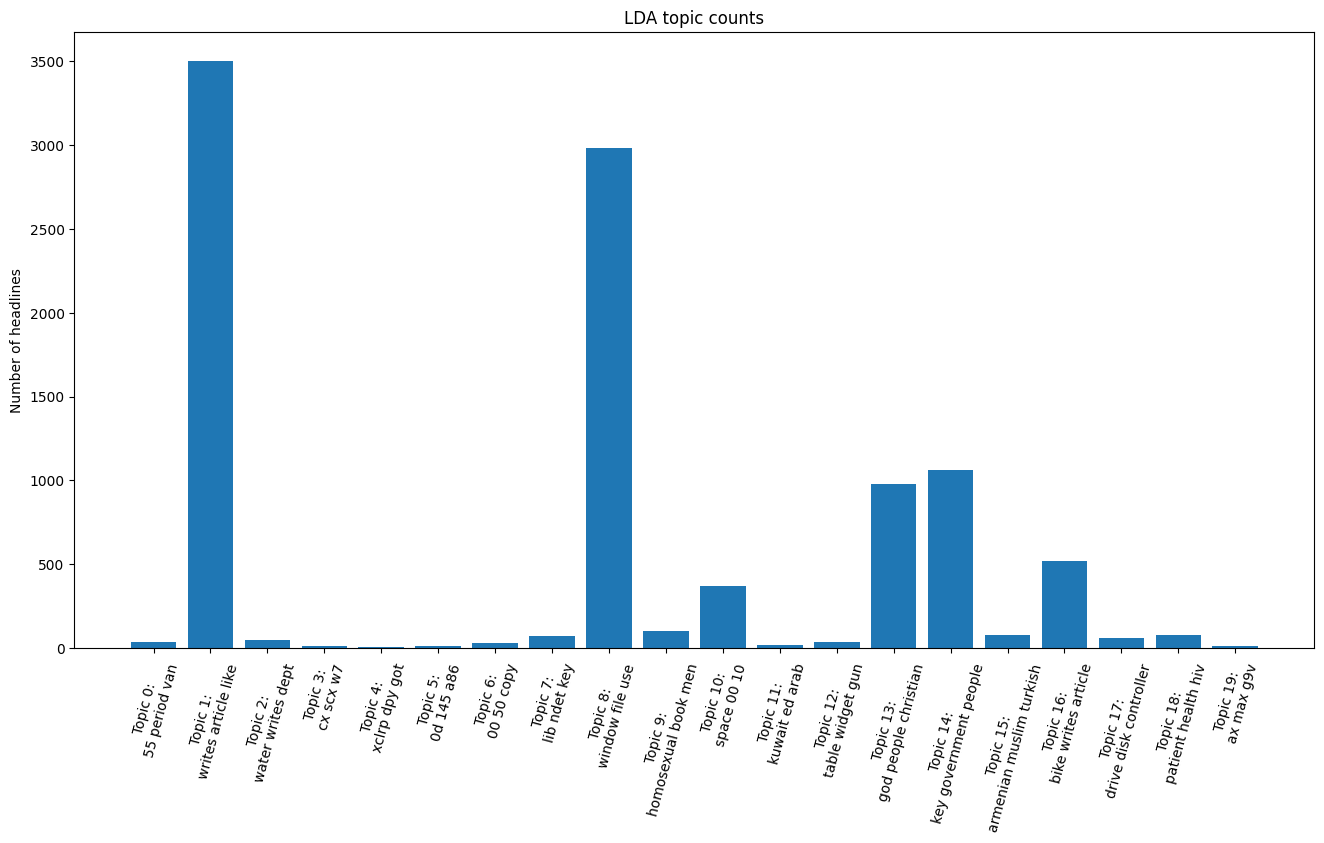

In [237]:
top_3_words = get_top_n_words_main(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels);
plt.xticks(rotation=75)
ax.set_title('LDA topic counts');
ax.set_ylabel('Number of headlines');

In [238]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100,
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 1.513s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.065764
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.951279
[t-SNE] KL divergence after 2000 iterations: 1.369221


In [239]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [240]:
top_3_words_lda = get_top_n_words_main(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), width=700, height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1],
                  text=top_3_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)